# Importing Libraries

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

# Loading Dataset

In [179]:
def make_dataset():
    bc = load_breast_cancer()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.3, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((398, 30), (171, 30), (398,), (171,))

In [180]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
350,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
384,13.280,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.02864,0.1617,0.05594,...,14.24,17.37,96.59,623.7,0.11660,0.26850,0.28660,0.09173,0.2736,0.07320
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,10.49,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.03384,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917


In [181]:
y_test.head()

474    1
172    0
41     0
549    1
337    0
Name: target, dtype: int64

In [182]:
y_train.value_counts(normalize=True)

target
1    0.653266
0    0.346734
Name: proportion, dtype: float64

# Decision Tree Classifier

In [183]:
model = DecisionTreeClassifier(random_state=1004)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8947368421052632

In [184]:
model = DecisionTreeClassifier(
    criterion = 'entropy', 
    max_depth = 7,         
    min_samples_split = 2,
    min_samples_leaf = 1, 
    random_state=1004)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9122807017543859

In [185]:
model = DecisionTreeClassifier(
    criterion = 'gini', 
    max_depth = 7,         
    min_samples_split = 2,
    min_samples_leaf = 1, 
    random_state=1004)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8947368421052632

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 29160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    

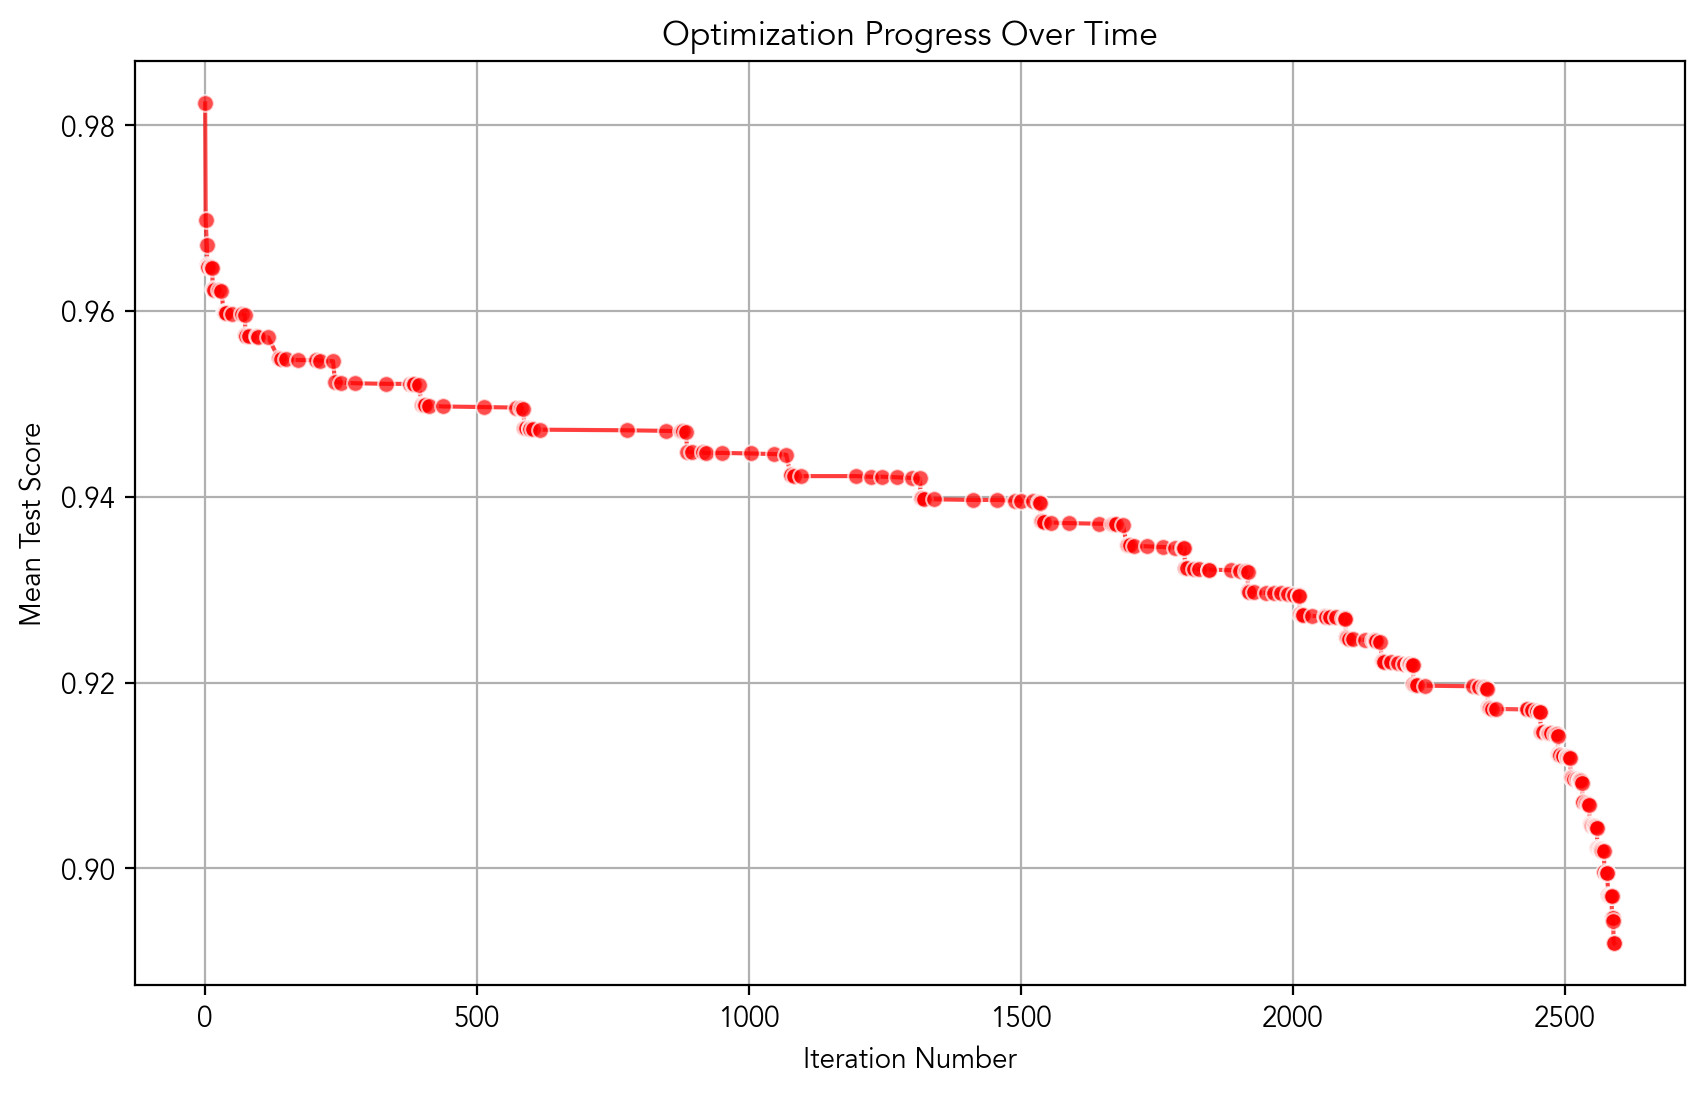

{'criterion': 'log_loss',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [248]:

params={'criterion':['gini', 'entropy', 'log_loss'], 
        'splitter':['best', 'random'],
        'max_depth':[3, 5, 7, 10, 15, 20], 
        'min_samples_split':[1, 2, 3, 4, 5, 10, 15, 20, 25],
        'min_samples_leaf':[1, 2, 3, 4, 5, 10, 15, 20, 25]
        }

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid = params, cv = 10, n_jobs = -1)
grid.fit(X_train, y_train)
results = grid.cv_results_
scores = pd.DataFrame(results).sort_values(by='rank_test_score')

plt.figure(figsize=(10, 6))
sns.lineplot(data=scores, x = 'rank_test_score', y = 'mean_test_score', marker='o', linestyle='-', color='r', alpha=0.7)
plt.title('Optimization Progress Over Time')
plt.xlabel('Iteration Number')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

grid.best_params_

In [ ]:
results = pd.DataFrame(results)
results.sort_values(by='rank_test_score').head()

In [249]:
model = DecisionTreeClassifier(
    splitter = 'random',
    criterion = 'log_loss', 
    max_depth = 20,         
    min_samples_split = 2,
    min_samples_leaf = 5, 
    random_state=1004)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

# 0.9181286549707602

0.8830409356725146

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
265 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
265 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    val

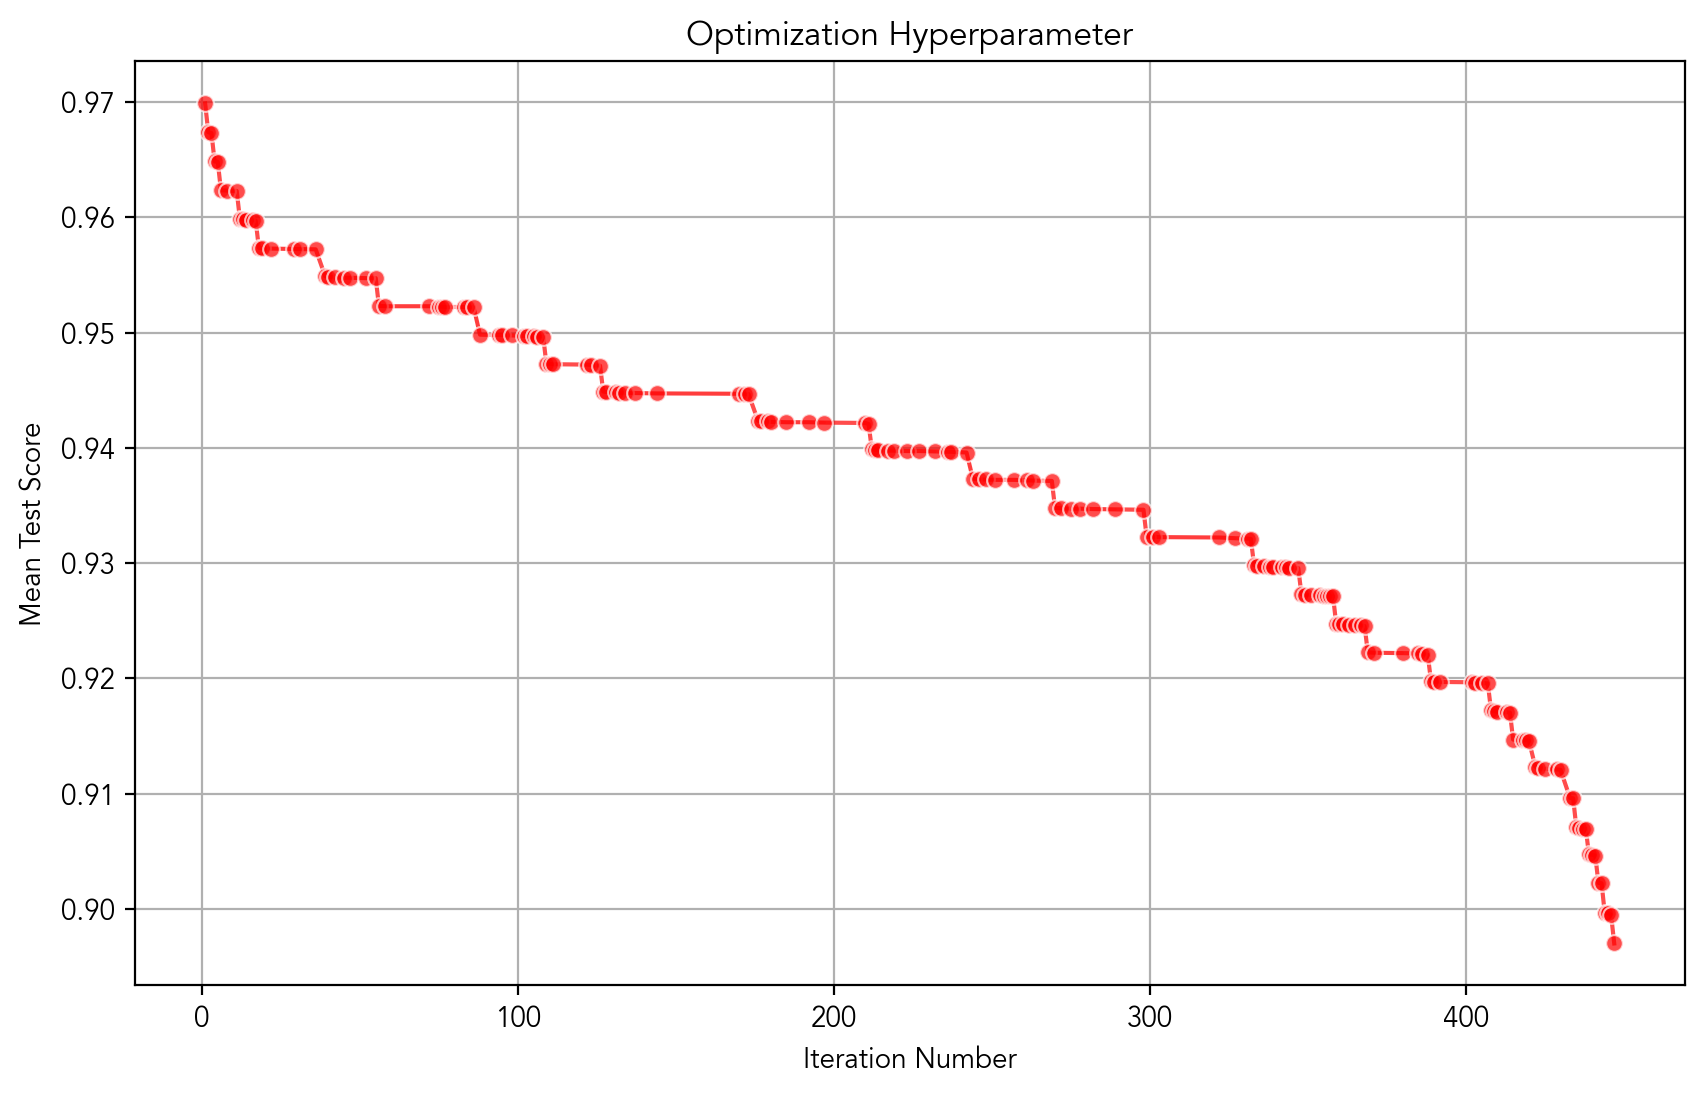

{'splitter': 'random',
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_depth': 15,
 'criterion': 'log_loss'}

In [247]:
params={'criterion':['gini', 'entropy', 'log_loss'], 
        'splitter':['best', 'random'],
        'max_depth':[3, 5, 7, 10, 15, 20], 
        'min_samples_split':[1, 2, 3, 4, 5, 10, 15, 20, 25],
        'min_samples_leaf':[1, 2, 3, 4, 5, 10, 15, 20, 25]
        }

model = DecisionTreeClassifier()
grid = RandomizedSearchCV(model, params, cv = 5, n_jobs = -1, n_iter = 500)
grid.fit(X_train, y_train)
results = grid.cv_results_
scores = pd.DataFrame(results).sort_values(by='rank_test_score')

plt.figure(figsize=(10, 6))
sns.lineplot(data=scores, x = 'rank_test_score', y = 'mean_test_score', marker='o', linestyle='-', color='r', alpha=0.7)
plt.title('Optimization Hyperparameter')
plt.xlabel('Iteration Number')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()


grid.best_params_

In [241]:
scores.head()

173    0.964842
195    0.964842
396    0.964842
372    0.964842
352    0.964842
Name: mean_test_score, dtype: float64

In [244]:
type(results)

dict

In [245]:
results = pd.DataFrame(results)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
346,0.006165,0.004690,0.000677,0.000081,best,3,4,20,log_loss,"{'splitter': 'best', 'min_samples_split': 3, '...",0.9750,0.9625,0.9625,0.987342,0.974684,0.972405,0.009287,1
464,0.001453,0.000583,0.000822,0.000288,random,2,3,5,gini,"{'splitter': 'random', 'min_samples_split': 2,...",0.9875,0.9750,0.9375,0.974684,0.974684,0.969873,0.016919,2
190,0.002785,0.000095,0.000574,0.000011,best,5,4,10,log_loss,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9625,0.9750,0.9625,0.974684,0.974684,0.969873,0.006021,2
369,0.001709,0.000857,0.000839,0.000426,random,2,2,10,entropy,"{'splitter': 'random', 'min_samples_split': 2,...",0.9500,1.0000,0.9375,0.974684,0.974684,0.967373,0.021751,4
383,0.003789,0.000889,0.000785,0.000106,best,10,4,5,entropy,"{'splitter': 'best', 'min_samples_split': 10, ...",0.9500,0.9625,0.9625,0.974684,0.974684,0.964873,0.009219,5


# Random Forest Classifier

In [25]:
model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

In [34]:
model = RandomForestClassifier(
    criterion = 'gini',
    n_estimators = 200, 
    max_depth = 5, 
    min_samples_split = 2,
    min_samples_leaf = 2, 
    random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9438596491228071

In [205]:
params={
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier()
grid = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    vali

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [203]:
model = RandomForestClassifier(
    criterion = 'gini',
    max_features = 'sqrt',
    n_estimators = 400, 
    max_depth = 20, 
    min_samples_split = 2,
    min_samples_leaf = 2, 
    random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

# 0.9415204678362573

0.9415204678362573

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 540 is smaller than n_iter=1000. Running 540 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
985 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    va

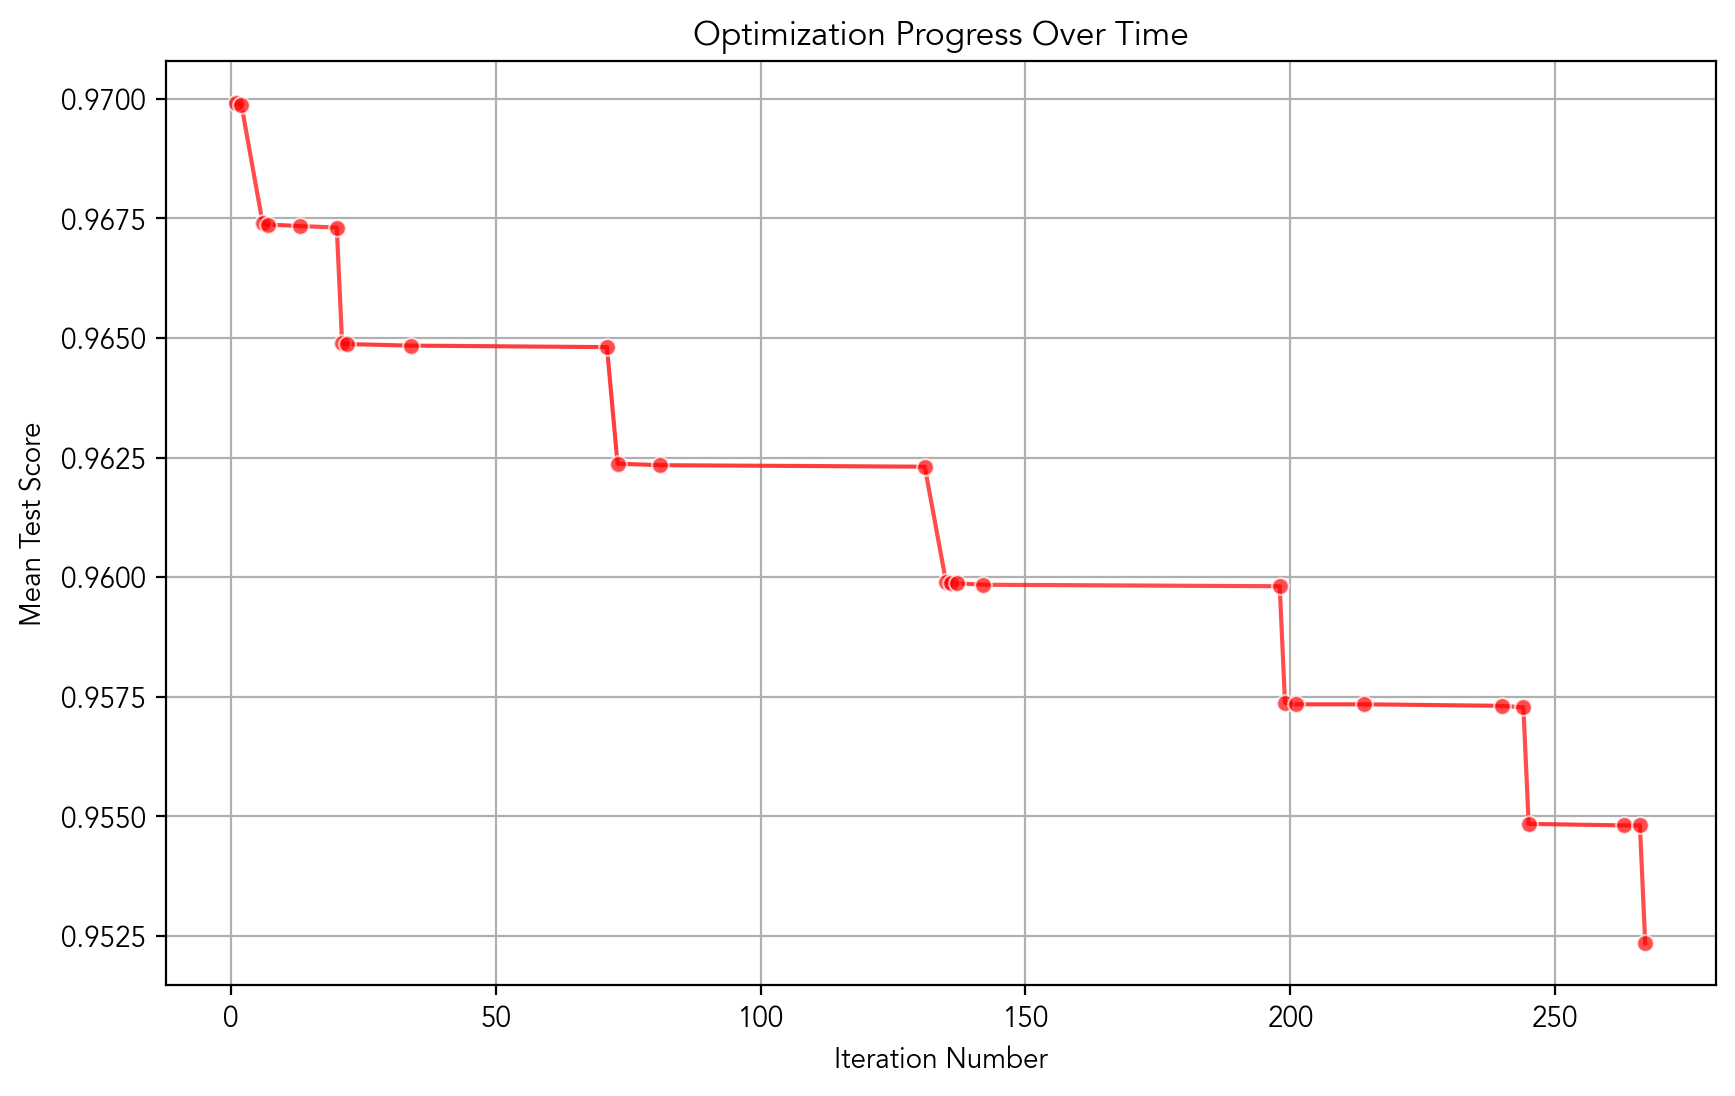

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [251]:
params={
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier()
grid = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=1000, cv=5, verbose=2, random_state=42, n_jobs=-1)
grid.fit(X_train, y_train)
results = grid.cv_results_
scores = pd.DataFrame(results).sort_values(by='rank_test_score')


plt.figure(figsize=(10, 6))
sns.lineplot(data=scores, x = 'rank_test_score', y = 'mean_test_score', marker='o', linestyle='-', color='r', alpha=0.7)
plt.title('Optimization Progress Over Time')
plt.xlabel('Iteration Number')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()





grid.best_params_

# xgboost

In [35]:
model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',
                      booster = 'gbtree',
                      objective = 'binary:logistic',
                      max_depth = 5,
                      learning_rate = 0.05,
                      n_estimators = 500,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1
                      
                      
# xgboost 하이퍼파라미터
# - booster(기본값 gbtree): 부스팅 알고리즘 (또는 dart, gblinear)
# - objective(기본값 binary:logistic): 이진분류 (다중분류: multi:softmax)
# - max_depth(기본값 6): 최대 한도 깊이
# - learning_rate(기본값 0.1): 학습률
# - n_estimators(기본값 100): 트리의 수
# - subsample(기본값 1): 훈련 샘플 개수의 비율
# - colsample_bytree(기본값 1): 특성 개수의 비율
# - n_jobs(기본값 1): 사용 코어 수 (-1: 모든 코어를 다 사용)
                     )
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9649122807017544

In [47]:
model = XGBClassifier(random_state=0, 
                      use_label_encoder=False, 
                      eval_metric='logloss',
                      booster = 'gbtree',
                      objective = 'multi:softmax',
                      max_depth = 6,
                      learning_rate = 0.05,
                      n_estimators = 500,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1,
                      num_class = len(set(y_train))
                     )
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9649122807017544

In [ ]:
model = XGBClassifier(random_state=0, 
                      use_label_encoder=False, 
                      eval_metric='logloss',
                      learning_rate = 0.05,
                      n_estimators = 500,
                     )
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set = eval_set, early_stopping_rounds=100)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

# Cross Validation

In [53]:
def make_dataset2():
    bc = load_breast_cancer()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

In [55]:

model = DecisionTreeClassifier(random_state=0)
kfold = KFold(n_splits = 5)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))


0.8771929824561403
0.9122807017543859
0.9473684210526315
0.9385964912280702
0.8407079646017699


In [57]:
model = DecisionTreeClassifier(random_state=0)

kfold = StratifiedKFold(n_splits = 10)
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

0.9649122807017544
0.8421052631578947
0.9122807017543859
0.8947368421052632
0.9298245614035088
0.8947368421052632
0.9122807017543859
0.9473684210526315
0.9298245614035088
0.9464285714285714


In [58]:
cross_val_score(model, X, y, cv=5)

array([0.90350877, 0.92105263, 0.9122807 , 0.94736842, 0.90265487])

In [60]:
scores = cross_val_score(model, X, y, cv=5).mean()
scores

0.9173730787144851

In [61]:
kfold = StratifiedKFold(n_splits = 10)
cross_val_score(model, X, y, cv=kfold)

array([0.96491228, 0.84210526, 0.9122807 , 0.89473684, 0.92982456,
       0.89473684, 0.9122807 , 0.94736842, 0.92982456, 0.94642857])

In [62]:
cross_val_score(model, X, y, cv=kfold).mean()

0.9174498746867167

# Evaluation

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9464285714285714

In [64]:
from sklearn.metrics import precision_score
precision_score(y_test, pred)

1.0

In [65]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.9142857142857143

In [66]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.955223880597015

In [72]:
model = XGBClassifier(random_state=0, 
                      use_label_encoder=False, 
                      eval_metric='logloss',
                     )
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)
pred

array([[5.21629035e-01, 4.78370965e-01],
       [9.99573410e-01, 4.26594808e-04],
       [9.97608721e-01, 2.39125779e-03],
       [9.99708652e-01, 2.91336444e-04],
       [9.98059988e-01, 1.94001838e-03],
       [9.99421835e-01, 5.78147941e-04],
       [9.99515474e-01, 4.84498421e-04],
       [9.99632180e-01, 3.67843168e-04],
       [5.16248703e-01, 4.83751327e-01],
       [9.99827087e-01, 1.72899308e-04],
       [9.99525368e-01, 4.74620756e-04],
       [9.99713361e-01, 2.86637282e-04],
       [6.26504421e-04, 9.99373496e-01],
       [2.74786949e-02, 9.72521305e-01],
       [4.20868397e-04, 9.99579132e-01],
       [1.21161342e-02, 9.87883866e-01],
       [5.14864922e-04, 9.99485135e-01],
       [2.17616558e-04, 9.99782383e-01],
       [7.25084543e-03, 9.92749155e-01],
       [4.43518162e-04, 9.99556482e-01],
       [9.99512851e-01, 4.87156358e-04],
       [1.98495388e-03, 9.98015046e-01],
       [9.99614596e-01, 3.85428721e-04],
       [6.52997494e-01, 3.47002476e-01],
       [2.425801

In [73]:
from sklearn.metrics import roc_auc_score
model = XGBClassifier(random_state=0, 
                      use_label_encoder=False, 
                      eval_metric='logloss',
                     )
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)
pred

roc_auc_score(y_test, pred[:,1])

0.9972789115646259

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
def make_dataset():
    bc = load_breast_cancer()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.5, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(
    n_estimators=500, 
    max_depth=5, 
    random_state=0)
model1.fit(X_train, y_train)
pred1 = model1.predict_proba(X_test)
print(accuracy_score(y_test, pred1[:,1].round()))

# xgboost
from xgboost import XGBClassifier
model2 = XGBClassifier(
    n_estimators=500, 
    max_depth=5, 
    random_state=0,
    eval_metric='logloss',
    objective = 'binary:logistic',
    use_label_encoder=False)
model2.fit(X_train, y_train)
pred2 = model2.predict_proba(X_test)
print(accuracy_score(y_test, pred2[:,1].round()))

0.9473684210526315
0.9614035087719298


# Linear Regression

In [75]:
# 데이터 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터
def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [77]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [78]:
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

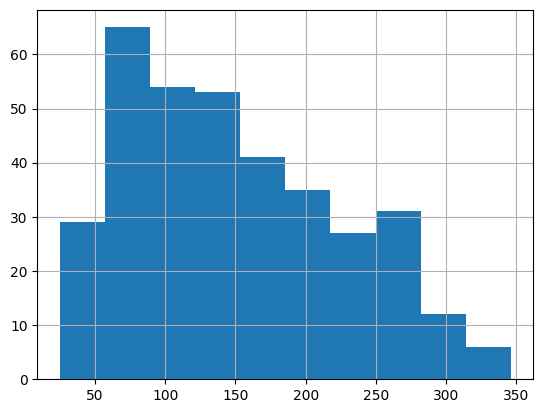

In [79]:
y_train.hist()

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

2707.631852164158

# Ridge

In [91]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 1)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

3522.119184207267

In [92]:
model.coef_

array([  31.2934206 ,  -71.44865465,  267.60596214,  197.36249197,
         14.61325736,  -13.88423665, -124.64983613,  106.21296724,
        221.0684933 ,  101.20254637])

In [95]:
coef = pd.DataFrame(model.coef_, index=X_train.columns, columns = ['alpha1'])
coef

,alpha1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [96]:
model = Ridge(alpha = 10)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

5521.884843903384

In [97]:
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [98]:
model = Ridge(alpha = 0.1)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

2744.9026742146716

In [99]:
coef['alpha0.1'] = model.coef_
coef

,alpha1,alpha10,alpha0.1
age,31.293421,16.703166,4.275162
sex,-71.448655,-1.796418,-205.210484
bmi,267.605962,61.026376,450.909749
bp,197.362492,47.434846,331.923682
s1,14.613257,18.491238,-84.311149
s2,-13.884237,13.440104,-54.662514
s3,-124.649836,-35.542087,-158.706512
s4,106.212967,38.896140,114.066890
s5,221.068493,55.276290,391.231834
s6,101.202546,35.868345,78.555458


In [100]:
model = Ridge(alpha = 0.05)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

2699.6595785438326

In [101]:
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.1,alpha0.05
age,31.293421,16.703166,4.275162,-0.508850
sex,-71.448655,-1.796418,-205.210484,-223.345659
bmi,267.605962,61.026376,450.909749,469.447848
bp,197.362492,47.434846,331.923682,348.368885
s1,14.613257,18.491238,-84.311149,-146.952481
s2,-13.884237,13.440104,-54.662514,-18.297550
s3,-124.649836,-35.542087,-158.706512,-141.658486
s4,106.212967,38.896140,114.066890,115.860926
s5,221.068493,55.276290,391.231834,432.508101
s6,101.202546,35.868345,78.555458,69.578796


In [102]:
from sklearn.metrics import mean_squared_error

# Define the alpha values
alphas = [0.001, 0.01, 0.05, 0.1, 1, 10]

# Initialize the minimum MSE and optimal alpha
min_mse = None
optimal_alpha = None

# For each alpha value
for alpha in alphas:
    # Create and fit the Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Make predictions on the test set
    preds = ridge.predict(X_test)
    
    # Compute the MSE
    mse = mean_squared_error(y_test, preds)
    
    # If this is the first MSE or if the MSE is smaller than the previous minimum
    if min_mse is None or mse < min_mse:
        # Update the minimum MSE and optimal alpha
        min_mse = mse
        optimal_alpha = alpha

print(f'The optimal alpha is {optimal_alpha} with an MSE of {min_mse:.4f}')

The optimal alpha is 0.01 with an MSE of 2675.8113


# Lasso

In [103]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

4179.152642946345

In [104]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 1)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

4179.152642946345

In [105]:
coef = pd.DataFrame(model.coef_, index=X_train.columns, columns = ['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [110]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 2)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179449031

In [111]:
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [112]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.05)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4583679188177

In [113]:
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


In [114]:
from sklearn.metrics import mean_squared_error

# Define the alpha values
alphas = [0.001, 0.01, 0.05, 0.1, 1, 10]

# Initialize the minimum MSE and optimal alpha
min_mse = None
optimal_alpha = None

# For each alpha value
for alpha in alphas:
    # Create and fit the Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Make predictions on the test set
    preds = lasso.predict(X_test)
    
    # Compute the MSE
    mse = mean_squared_error(y_test, preds)
    
    # If this is the first MSE or if the MSE is smaller than the previous minimum
    if min_mse is None or mse < min_mse:
        # Update the minimum MSE and optimal alpha
        min_mse = mse
        optimal_alpha = alpha

print(f'The optimal alpha is {optimal_alpha} with an MSE of {min_mse:.4f}')

The optimal alpha is 0.01 with an MSE of 2676.3872


# ElasticNet

In [115]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 1)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270961171604

In [116]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.0001, l1_ratio=0.6)
model.fit(X_train, y_train)
pred =model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6031657225317

In [117]:
# Define the l1_ratio values
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize the minimum MSE and optimal l1_ratio
min_mse = None
optimal_l1_ratio = None

# For each l1_ratio value
for l1_ratio in l1_ratios:
    # Create and fit the ElasticNet regression model
    elasticnet = ElasticNet(alpha=0.0001, l1_ratio=l1_ratio)
    elasticnet.fit(X_train, y_train)
    
    # Make predictions on the test set
    preds = elasticnet.predict(X_test)
    
    # Compute the MSE
    mse = mean_squared_error(y_test, preds)
    
    # If this is the first MSE or if the MSE is smaller than the previous minimum
    if min_mse is None or mse < min_mse:
        # Update the minimum MSE and optimal l1_ratio
        min_mse = mse
        optimal_l1_ratio = l1_ratio

print(f'The optimal l1_ratio is {optimal_l1_ratio} with an MSE of {min_mse:.4f}')

The optimal l1_ratio is 0.6 with an MSE of 2675.6032


# Random Forest & xgboost

In [121]:
from sklearn.ensemble import RandomForestRegressor
model_r = RandomForestRegressor()
model_r.fit(X_train, y_train)
pred =model_r.predict(X_test)
print(mean_squared_error(y_test, pred))

3328.0951516853934


In [122]:
from xgboost import XGBRegressor
model_x = XGBRegressor()
model_x.fit(X_train, y_train)
pred =model_x.predict(X_test)
print(mean_squared_error(y_test, pred))

4265.475533439266


# Hyperparameter Tuning

In [123]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [124]:
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

In [125]:
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

In [126]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [127]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

# GridSearchCV

In [129]:
xgb = XGBRegressor()
grid = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'subsample': [0.9, 0.8, 0.7]})

In [130]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}

In [131]:
xgb = XGBRegressor(
    learning_rate=0.05, 
    max_depth=3, 
    n_estimators=100, 
    subsample=0.9)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(mean_squared_error(y_test, pred))

3179.8831661279423


# Random Search

In [133]:
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=5, n_iter=100, n_jobs=-1)
grid.fit(X, y)

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.9, 0.8, 0.7]})

In [134]:
grid.best_params_

{'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

In [135]:
xgb = XGBRegressor(
    learning_rate=0.05, 
    max_depth=3, 
    n_estimators=100, 
    subsample=0.9)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(mean_squared_error(y_test, pred))

3179.8831661279423


# Regression Evaluation

In [137]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

47.91031252400259

In [139]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3179.8831661279423

In [140]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

56.39045279236497

In [141]:
# RMSLE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.4309284639311496

In [143]:
# R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5143376955352661

# Dataset From sklearn

In [148]:
from sklearn.datasets import load_diabetes
def make_dataset():
    bc = load_diabetes()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.3, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [149]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
232,0.012648,0.050680,0.000261,-0.011420,0.039710,0.057245,-0.039719,0.056081,0.024055,0.032059
81,0.012648,0.050680,-0.022373,-0.029770,0.010815,0.028435,-0.021311,0.034309,-0.006081,-0.001078
227,0.067136,0.050680,-0.029918,0.057437,-0.000193,-0.015719,0.074412,-0.050564,-0.038460,0.007207
334,-0.060003,0.050680,-0.047163,-0.022885,-0.071743,-0.057681,-0.006584,-0.039493,-0.062917,-0.054925
83,-0.038207,-0.044642,0.009961,-0.046985,-0.059359,-0.052983,-0.010266,-0.039493,-0.015999,-0.042499


In [150]:
y_train.head()

232    259.0
81      51.0
227    108.0
334     72.0
83     210.0
Name: target, dtype: float64